Considering a dataset with two subtypes of lung cancer, the goal was to develop machine learning methods to perform good classification accuracy between the two subtypes.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from numpy import array
from numpy import cov
import scipy.linalg as la
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import time

start = time.time()


In [25]:
def precision_binary_class_scikit(df):
    df = df.sample(frac=1)
    X = df.iloc[:,1:-1]
    Y = df.iloc[:,-1]
    X=X.values
    X=X.T
    
    y=Y.values
    y=y-1
    
    #Preprocessing the data by removing the outliers using the interquartile range method
    
    for index_element,element in enumerate(X):
        Q1=np.percentile(element,25)
        Q3=np.percentile(element,75)
        med = np.percentile(element,50)
        IQR = Q3-Q1
        for index_value,value in enumerate(element):
            if value < (Q1 - 1.5 * IQR) or value > (Q3 + 1.5 * IQR):
                X[index_element,index_value] = med
    X=X.T
    
    #Seperating the data into a training set and a validation set
    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=5,shuffle=True,stratify=Y)
    
    #Scaling the data
    min_max_scaler = preprocessing.MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_test = min_max_scaler.fit_transform(X_test)
    
    X_train = X_train.T
    
    #Reducing the number of features using Principal Component Analysis

    sigma = cov(X_train)
    values, vectors = la.eig(sigma)
    values_sum = sum(abs(values))

    criteria = abs(values[0])
    i=0
    error = criteria / values_sum
    while error < 0.9:
        i=i+1
        criteria = criteria + abs(values[i])
        error = criteria / values_sum

    values_PCA = values[0:i+1]
    values_PCA = values_PCA.real
    vectors_PCA = vectors[:,0:i+1]
    vectors_PCA = vectors_PCA.real
    P_train = vectors_PCA.T.dot(X_train)
    P_train=P_train.T
    
    
    
    from sklearn.model_selection import GridSearchCV #GridSearch enables looking for the set of optimal parameters
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import recall_score
    
    clf = LogisticRegression(penalty='l2',max_iter = 5000) #squared penalty
    grid_values = {'C':[0.0001,0.0005,0.001,0.005,0.007,0.009,0.02,0.05,0.09,0.2,0.5],'solver':['liblinear','newton-cg']}
    # C represents the inverse of the learning rate
    # liblinear and newton are different solvers adapted for a small dataset
    
    grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'accuracy',cv=5) #The performance criteria is set to be the accuracy
    grid_clf_acc.fit(P_train, Y_train)
    

    P_test = vectors_PCA.T.dot(X_test.T)
    P_test =P_test.T
    
    y_pred_acc = grid_clf_acc.predict(P_test)
    print(grid_clf_acc.best_params_)
    
    return y_pred_acc,accuracy_score(Y_test, y_pred_acc),Y_test

In [26]:
donnees_mes = pd.read_excel(r'C:\Users\p-emm\Desktop\Dossiers\Etudes\ENS\M1 EEA\Stage_M1\Base_de_données\Features of IA subtypes_2type.xlsx')
res = []
prediction_ML = []
vrai_resultat = []

for j in range(15):
    prediction_obtenue,precision,vraie_valeur = precision_binary_class_scikit(donnees_mes)
    res.append(precision)
    prediction_ML.append(prediction_obtenue)
    vrai_resultat.append(vraie_valeur)

end = time.time()

elapsed = end - start

C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.05, 'solver': 'newton-cg'}


C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.0005, 'solver': 'newton-cg'}


C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.007, 'solver': 'newton-cg'}


C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.09, 'solver': 'liblinear'}


C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.2, 'solver': 'liblinear'}


C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.2, 'solver': 'liblinear'}


C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.2, 'solver': 'liblinear'}


C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.05, 'solver': 'liblinear'}


C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.02, 'solver': 'liblinear'}


C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.09, 'solver': 'liblinear'}


C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.005, 'solver': 'liblinear'}


C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.05, 'solver': 'liblinear'}


C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.005, 'solver': 'liblinear'}


C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.2, 'solver': 'liblinear'}


C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


{'C': 0.05, 'solver': 'liblinear'}


C:\Users\p-emm\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [27]:
print("mean accuracy : " + str(np.mean(res)))

mean accuracy : 0.8842105263157894


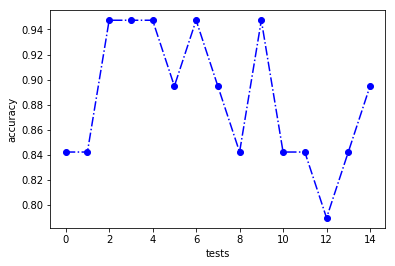

In [28]:
#Plotting the mean accuracy regarding the number of tests

plt.plot(res,'bo-.')
plt.xlabel("tests")
plt.ylabel("accuracy")
plt.show()

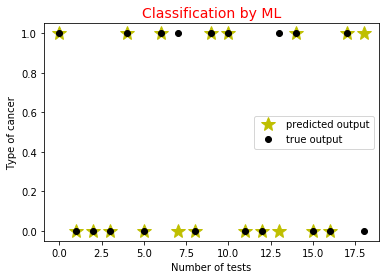

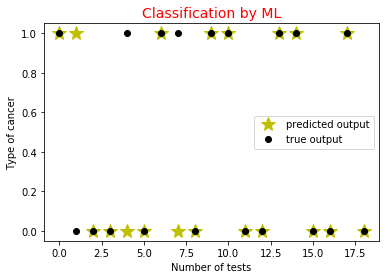

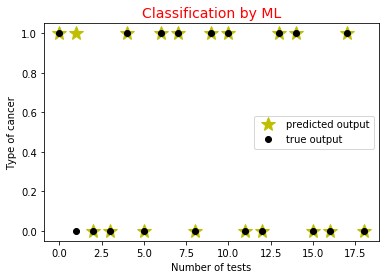

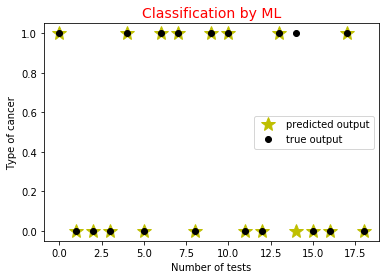

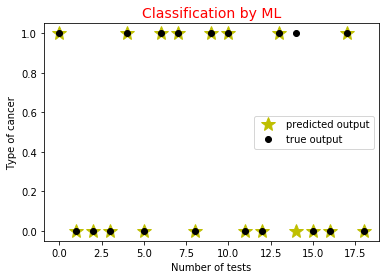

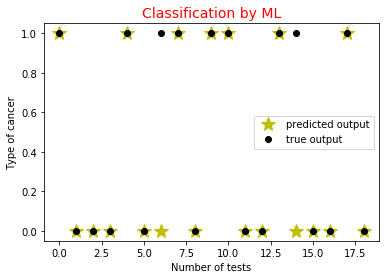

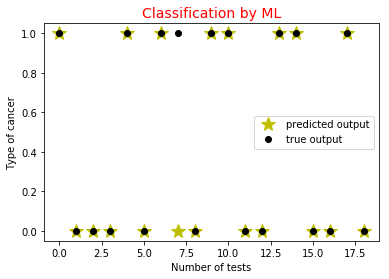

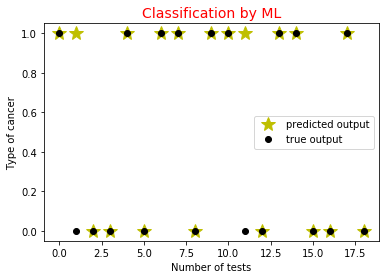

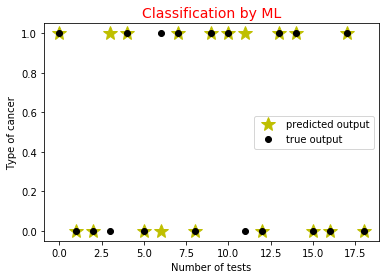

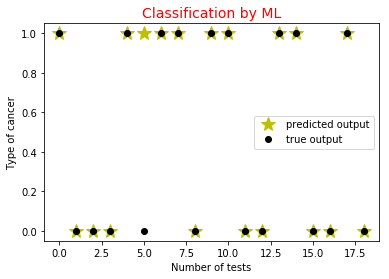

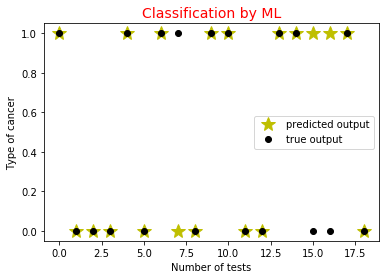

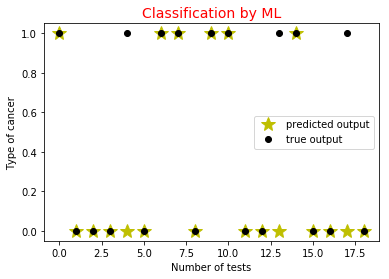

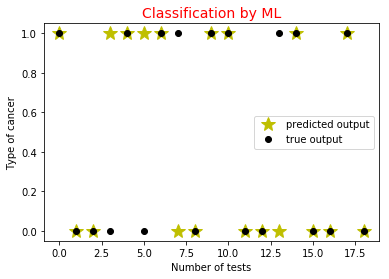

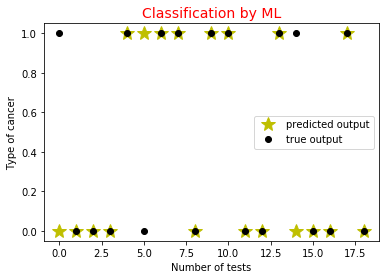

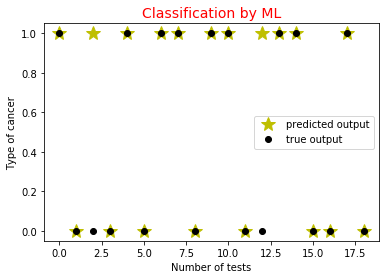

In [29]:
plt.figure()
for i in range(1,len(vrai_resultat)+1):
    plt.plot(prediction_ML[i-1],'y*',label='predicted output',markersize = 15)
    plt.plot(vrai_resultat[i-1],'ko',label='true output')
    plt.xlabel("Number of tests")
    plt.ylabel("Type of cancer")
    plt.legend()
    plt.title('Classification by ML', fontsize = 14, color='red')
    plt.show()

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix')

#     print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
#            xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix



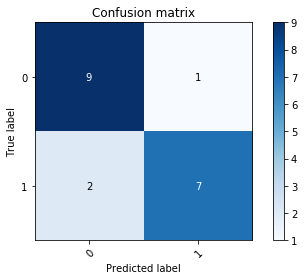

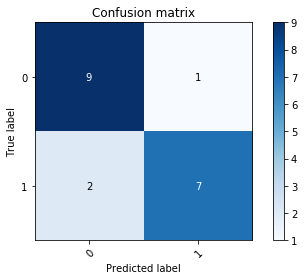

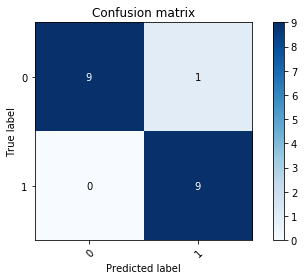

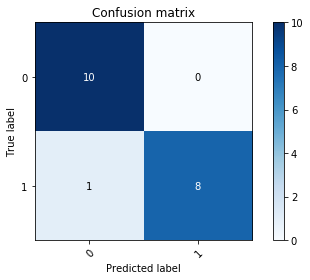

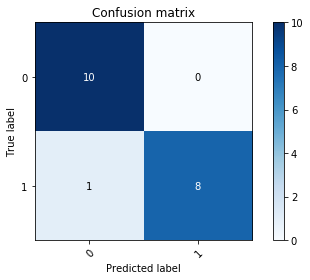

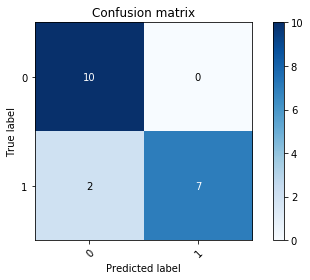

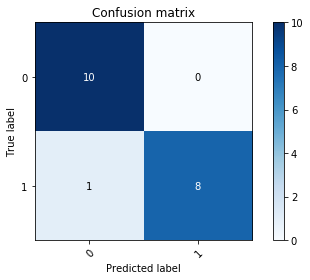

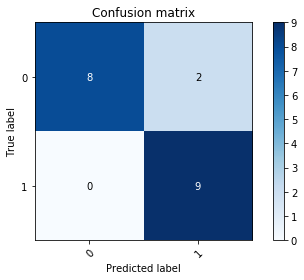

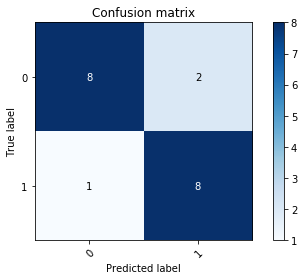

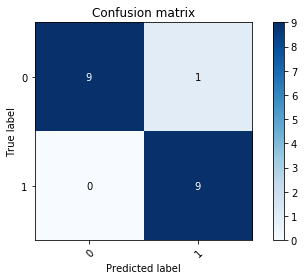

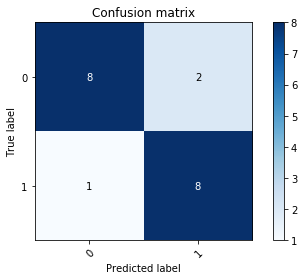

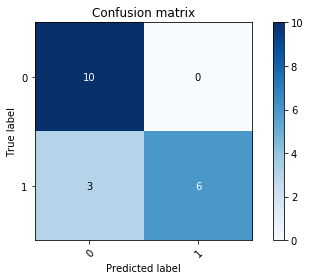

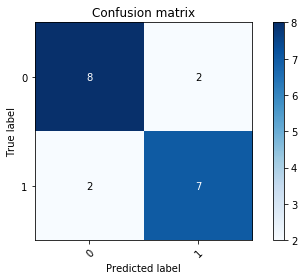

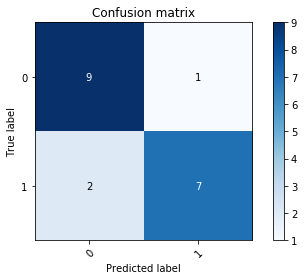

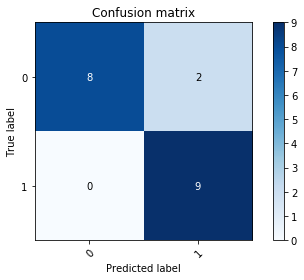

In [31]:
#Plotting the confusion matrix

from sklearn.metrics import confusion_matrix
for i in range(len(vrai_resultat)):
    plot_confusion_matrix(vrai_resultat[i], prediction_ML[i],title='Confusion matrix')